In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib as plt
import numpy as np

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df_train.shape[0],df_test.shape[0]

(891, 418)

In [7]:
df_train.Age.hist(bins=20)

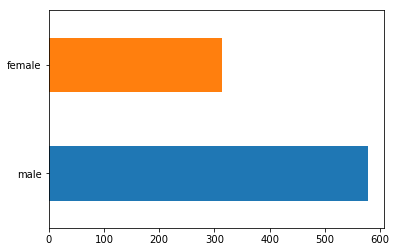

In [8]:
df_train.Sex.value_counts().plot(kind='barh')

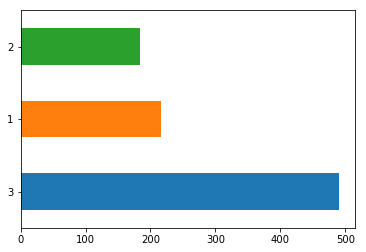

In [9]:
df_train['Pclass'].value_counts().plot(kind='barh')

Text(0.5, 0, '% survive')

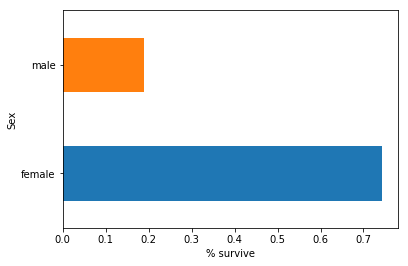

In [10]:
df_train.groupby('Sex').Survived.mean().plot(kind='barh').set_xlabel('% survive')

In [11]:
df_train[('Sex')] = (df_train[('Sex')] == 'male')*1

In [12]:
df_train[('Embarked')].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [13]:
df_train[('Embarked')] = df_train[('Embarked')].dropna().map({'S':0,'C':1,'Q':2}).astype(int)

In [14]:
df_train[('Age')] = df_train[('Age')].fillna(df_train[('Age')].mean())

In [15]:
df_train = df_train.drop(['Name','Ticket','Cabin'],axis=1)

In [16]:
selected_feature = ['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked','Survived']
df_train[(selected_feature)].shape

(891, 8)

In [17]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0.0
1,2,1,1,0,38.0,1,0,71.2833,1.0
2,3,1,3,0,26.0,0,0,7.9250,0.0
3,4,1,1,0,35.0,1,0,53.1000,0.0
4,5,0,3,1,35.0,0,0,8.0500,0.0


In [18]:
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [20]:
X_scaled = pd.DataFrame(scaler.fit_transform(X))
X_scaled.head()

C:\Users\Asus\anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,0,1,2,3,4,5,6,7
0,0.000000,1.0,1.0,0.271174,0.125,0.0,0.014151,0.0
1,0.001124,0.0,0.0,0.472229,0.125,0.0,0.139136,0.5
2,0.002247,1.0,0.0,0.321438,0.000,0.0,0.015469,0.0
3,0.003371,0.0,0.0,0.434531,0.125,0.0,0.103644,0.0
4,0.004494,1.0,1.0,0.434531,0.000,0.0,0.015713,0.0


In [ ]:
def clean_data(data):
    data[('Sex')] = (data[('Sex')] == 'male')*1
    data[('Embarked')] = data[('Embarked')].dropna().map({'S':0,'C':1,'Q':2}).astype(int) 
    data[('Age')] = data[('Age')].fillna(data[('Age')].mean())
    data = data.drop(['Name','Ticket','Cabin'],axis=1)
    
    return data   

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20)

In [27]:
df_test_clean = clean_data(df_test)

In [28]:
df_test_clean.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,2
1,893,3,0,47.0,1,0,7.0000,0
2,894,2,1,62.0,0,0,9.6875,2
3,895,3,1,27.0,0,0,8.6625,0
4,896,3,0,22.0,1,1,12.2875,0


In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
X_train.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    2
dtype: int64

In [31]:
X_train = X_train.fillna(0)

In [32]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

C:\Users\Asus\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [35]:
clf.score(X_test, y_test)

0.8324022346368715